## Engagement Exploratory Data Analysis

In [1]:
# Load the libraries
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(gridExtra)))

# Load the data
load("~/Documents/vcf/data/voting_el.RData")
load("~/Documents/vcf/data/reaction_el.RData")
load("~/Documents/vcf/data/post_log.RData")
load("~/Documents/vcf/data/vcf_data.RData")

# Relabel the group variable
vcf_data$group <- vcf_data$group %>% as.character()
vcf_data$group[vcf_data$group == "Gist"] <- "Treatment"
vcf_data$group <- factor(vcf_data$group, levels = c("Treatment", "Control"))
vcf_data$group %>% table()

.
Treatment   Control 
      278       229 

### Remained in group at end of program

**Left group**
- Wave 1 Treatment: 19
- Wave 1 Control: 6
- Wave 2 Treatment: 6
- Wave 2 Control: 2

In [2]:
treatment_drops <- 19 + 6
treatment_retained <- 1 - treatment_drops/sum(vcf_data$group == "Treatment")
print(paste0("Treatment Retention: ", treatment_retained))

control_drops <- 6 + 2
control_retained <- 1 - control_drops/sum(vcf_data$group == "Control")
print(paste0("Control Retention: ", control_retained))

[1] "Treatment Retention: 0.910071942446043"
[1] "Control Retention: 0.965065502183406"


### Reported being highly satisfied 

In [3]:
vcf_data %>% filter(vaccinated_prior == FALSE) %>%
  filter(!is.na(program_satisfaction_6), group == "Treatment") %>%
  summarise(n = n(),
            satisified_count = (as.numeric(program_satisfaction_6) >= 5) %>% sum(na.rm=TRUE),
            sat_perc = round(satisified_count/n, 4),
            period = "6-week") %>% 
  select(period, n, satisified_count, sat_perc)  

period,n,satisified_count,sat_perc
<chr>,<int>,<int>,<dbl>
6-week,182,136,0.7473


### Repored messages as being highly informative

In [4]:
vcf_data %>% filter(vaccinated_prior == FALSE) %>%
  filter(!is.na(messages_informative_6), group == "Treatment") %>%
  summarise(n = n(),
            messages_informative = (as.numeric(messages_informative_6) >= 4) %>% sum(na.rm=TRUE),
            informative_perc = round(messages_informative/n, 4),
            period = "6-week") %>% 
  select(period, n, messages_informative, informative_perc)

period,n,messages_informative,informative_perc
<chr>,<int>,<int>,<dbl>
6-week,180,137,0.7611


### Activity Summary

In [5]:
post_log %>% count()

n
<int>
1849


In [6]:
post_log %>% group_by(post_type) %>% count()

post_type,n
<chr>,<int>
comment,1625
post,224


In [7]:
post_log %>% group_by(post_source) %>% summarize(Total = n()) %>% left_join(
    post_log %>% filter(post_type == "post") %>% group_by(post_source) %>% summarize(Post = n()), 
    by = "post_source") %>% left_join(
post_log %>% filter(post_type != "post") %>% group_by(post_source) %>% summarize(Comment = n()),
    by = "post_source")

post_source,Total,Post,Comment
<chr>,<int>,<int>,<int>
admin,680,172,508
user,1169,52,1117


### Comments or posts

In [8]:
active <- post_log %>% filter(author != "111111") %>% .$author %>% as.character() %>% unique() 
print(paste0("Active members: ", length(active)))
inactives <- vcf_data$mturk_code[!(vcf_data$mturk_code %in% active) & (vcf_data$group == "Treatment")]
print(paste0("Inactive members: ", length(inactives)))
comment_counts <- c(post_log %>% filter(author != "111111") %>% 
                   group_by(author) %>% count() %>% .$n,
                   rep(0, length(inactives))) 
print(paste0("SD: ", comment_counts %>% sd()))
comment_counts %>% summary()

[1] "Active members: 120"
[1] "Inactive members: 158"
[1] "SD: 12.7053973791408"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.205   3.000 161.000 

### Comments

In [9]:
active <- post_log %>% filter(author != "111111") %>% .$author %>% as.character() %>% unique() 
print(paste0("Active members: ", length(active)))
inactives <- vcf_data$mturk_code[!(vcf_data$mturk_code %in% active) & (vcf_data$group == "Treatment")]
print(paste0("Inactive members: ", length(inactives)))
comment_counts <- c(post_log %>% filter(author != "111111") %>% 
                    filter(post_type == "comment") %>% 
                    group_by(author) %>% count() %>% .$n,
                    rep(0, length(inactives))) 
print(paste0("SD: ", comment_counts %>% sd()))
comment_counts %>% summary()

[1] "Active members: 120"
[1] "Inactive members: 158"
[1] "SD: 12.584754451559"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.107   3.000 161.000 

### Reactions

In [10]:
active <- reaction_el %>% filter(member != "111111") %>% .$member %>% as.character() %>% unique() 
print(paste0("Active members: ", length(active)))
inactives <- vcf_data$mturk_code[!(vcf_data$mturk_code %in% active) & (vcf_data$group == "Treatment")]
print(paste0("Inactive members: ", length(inactives)))
reaction_counts <- c(reaction_el %>% filter(member != "111111") %>% 
                     group_by(member) %>% count() %>% .$n,
                     rep(0, length(inactives))) 
print(paste0("SD: ", reaction_counts %>% sd()))
reaction_counts %>% summary()

[1] "Active members: 114"
[1] "Inactive members: 164"
[1] "SD: 15.0235394344131"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00    6.27    4.00  121.00 

### Votes

In [11]:
active <- voting_el %>% filter(voter != "111111") %>% .$voter %>% as.character() %>% unique() 
print(paste0("Active members: ", length(active)))
inactives <- vcf_data$mturk_code[!(vcf_data$mturk_code %in% active) & (vcf_data$group == "Treatment")]
print(paste0("Inactive members: ", length(inactives)))
vote_counts <- c(voting_el %>% filter(voter != "111111") %>% 
                     group_by(voter) %>% count() %>% .$n,
                     rep(0, length(inactives))) 
print(paste0("SD: ", vote_counts %>% sd()))
vote_counts %>% summary()

[1] "Active members: 127"
[1] "Inactive members: 151"
[1] "SD: 2.08987290543606"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.385   2.000   8.000 

### Activity

In [12]:
reactors <- reaction_el %>% filter(member != "111111") %>% .$member
voters <- voting_el %>% filter(voter != "111111") %>% .$voter
commenters <- post_log %>% filter(author != "111111") %>% .$author
active_list <- c(reactors, voters, commenters) 
inactive_list <- vcf_data$mturk_code[vcf_data$group == "Treatment"]
inactive_list <- inactive_list[!(inactive_list %in% active_list)]
print(paste0("Total Member: ", length(vcf_data$mturk_code[vcf_data$group == "Treatment"])))
print(paste0("Active Member: ", length(active_list %>% unique())))
print(paste0("Inactive Member: ", length(inactive_list %>% unique())))

active_counts <- c(active_list %>% table(), rep(0, length(inactive_list)))
print(paste0("mean activity count: ", mean(active_counts)))
print(paste0("sd activity count: ", sd(active_counts)))

[1] "Total Member: 278"
[1] "Active Member: 167"
[1] "Inactive Member: 111"
[1] "mean activity count: 11.8597122302158"
[1] "sd activity count: 25.5072389227454"


## ANCOVA for Active Users

In [13]:
active_users <- c(voting_el$voter %>% as.character(),
                  post_log$author %>% as.character(),
                  reaction_el$member %>% as.character()) %>% unique()
print(length(active_users))

[1] 168


In [14]:
library(emmeans)
library(epitools)

# Filter people who were already vaccinated
vcf_data <- vcf_data %>% filter(vaccinated_prior == FALSE) 
vcf_data <- vcf_data %>% filter(mturk_code %in% active_users | group == "Control")

# Add a "vaccinated" response to intentions that has a value of 8
vcf_data$intention_6 <-  factor(vcf_data$intention_6, 
                                levels = c(levels(vcf_data$intention_6),
                                           "Vaccinated"))

# Recode intentions for vaccinated people as a vaccinated (8) response
vcf_data$intention_6[vcf_data$vax_y_n_6 == "Yes"] <- "Vaccinated"

# Relabel the wave variable
vcf_data$wave <- "Wave 1"
vcf_data$wave[vcf_data$trial == 3] <- "Wave 2"
vcf_data$wave <- factor(vcf_data$wave, levels = c("Wave 1", "Wave 2"))

# Relabel the group variable
vcf_data$group <- vcf_data$group %>% as.character()
vcf_data$group[vcf_data$group == "Gist"] <- "Treatment"
vcf_data$group <- factor(vcf_data$group, levels = c("Treatment", "Control"))

# Apply a z-transform so all outcome variables are on the same scale
z_transform <- function(measure, transform_var){
    mean <- c(vcf_data %>% select(paste0("base_", measure)) %>% unlist() %>% as.numeric(),
              vcf_data %>% select(paste0(measure, "_2")) %>% unlist() %>% as.numeric(),
              vcf_data %>% select(paste0(measure, "_4")) %>% unlist() %>% as.numeric(),
              vcf_data %>% select(paste0(measure, "_6")) %>% unlist() %>% as.numeric()) %>%
              mean(na.rm = TRUE)
    sd <-  c(vcf_data %>% select(paste0("base_", measure)) %>% unlist() %>% as.numeric(),
             vcf_data %>% select(paste0(measure, "_2")) %>% unlist() %>% as.numeric(),
             vcf_data %>% select(paste0(measure, "_4")) %>% unlist() %>% as.numeric(),
             vcf_data %>% select(paste0(measure, "_6")) %>% unlist() %>% as.numeric()) %>%
             sd(na.rm = TRUE)
  
    #Shift the transform by to allow a Box-cox transform later in the workflow
    (((vcf_data %>% select(all_of(transform_var)) %>% unlist() %>% as.numeric()) - mean)/sd) + 4  
}

# Baseline
vcf_data$base_intention_n <- z_transform(measure = "intention", transform_var = "base_intention")
vcf_data$base_encourage_n <- z_transform(measure = "encourage", transform_var = "base_encourage")
vcf_data$base_sp_trust_n <- z_transform(measure = "sp_trust", transform_var = "base_sp_trust")
vcf_data$base_sp_complacency_n <- z_transform(measure = "sp_complacency", transform_var = "base_sp_complacency")
vcf_data$base_sp_necessity_n <- z_transform(measure = "sp_necessity", transform_var = "base_sp_necessity")
vcf_data$base_sp_importance_n <- z_transform(measure = "sp_importance", transform_var = "base_sp_importance")
vcf_data$base_sp_confidence_n <- z_transform(measure = "sp_confidence", transform_var = "base_sp_confidence")
vcf_data$base_sp_safety_n <- z_transform(measure = "sp_safety", transform_var = "base_sp_safety")
vcf_data$base_sp_efficacy_n <- z_transform(measure = "sp_efficacy", transform_var = "base_sp_efficacy")
vcf_data$base_gen_confidence_n <- z_transform(measure = "gen_confidence", transform_var = "base_gen_confidence")
vcf_data$base_gen_safety_n <- z_transform(measure = "gen_safety", transform_var = "base_gen_safety")
vcf_data$base_gen_efficacy_n <- z_transform(measure = "gen_efficacy", transform_var = "base_gen_efficacy")
vcf_data$base_resp_princ_n <- z_transform(measure = "resp_princ", transform_var = "base_resp_princ")

# 6 week
vcf_data$intention_6_n <- z_transform(measure = "intention", transform_var = "intention_6")
vcf_data$encourage_6_n <- z_transform(measure = "encourage", transform_var = "encourage_6")
vcf_data$sp_trust_6_n <- z_transform(measure = "sp_trust", transform_var = "sp_trust_6")
vcf_data$sp_complacency_6_n <- z_transform(measure = "sp_complacency", transform_var = "sp_complacency_6")
vcf_data$sp_necessity_6_n <- z_transform(measure = "sp_necessity", transform_var = "sp_necessity_6")
vcf_data$sp_importance_6_n <- z_transform(measure = "sp_importance", transform_var = "sp_importance_6")
vcf_data$sp_confidence_6_n <- z_transform(measure = "sp_confidence", transform_var = "sp_confidence_6")
vcf_data$sp_safety_6_n <- z_transform(measure = "sp_safety", transform_var = "sp_safety_6")
vcf_data$sp_efficacy_6_n <- z_transform(measure = "sp_efficacy", transform_var = "sp_efficacy_6")
vcf_data$gen_confidence_6_n <- z_transform(measure = "gen_confidence", transform_var = "gen_confidence_6")
vcf_data$gen_safety_6_n <- z_transform(measure = "gen_safety", transform_var = "gen_safety_6")
vcf_data$gen_efficacy_6_n <- z_transform(measure = "gen_efficacy", transform_var = "gen_efficacy_6")
vcf_data$resp_princ_6_n <- z_transform(measure = "resp_princ", transform_var = "resp_princ_6")

# Collapse political views into 3 categories
vcf_data$political_view2 <- vcf_data$political_view
vcf_data$political_view2[vcf_data$political_view2 %in% 
                          c("Slightly conservative",
                            "Very conservative")] <- "Conservative"
vcf_data$political_view2[vcf_data$political_view2 %in% 
                           c("Slightly liberal",
                             "Very liberal")] <- "Liberal"
vcf_data$political_view2[vcf_data$political_view2 == "Prefer not to answer"] <- "No answer"
vcf_data$political_view2 <- factor(
    vcf_data$political_view2,
    levels = c("Moderate", "Liberal", "Conservative", "No answer")
)

# Dichotomize Trust
dichotomize <- function(vals){
    vals <- vals %>% as.character()
    vals[vals == "Not at all"] <- "distrust"
    vals[vals == "A little"] <- "trust"
    vals[vals == "Don't know"] <- "trust"
    vals[vals == "A great deal"] <- "trust"
    vals[vals %in% c("Not at all", "A little", "A great deal")] <- NA
    vals <- factor(vals, levels = c("trust", "distrust"))
    vals}

vcf_data$fed_gov_trust <- vcf_data$fed_gov_trust %>% dichotomize()
vcf_data$local_gov_trust <- vcf_data$local_gov_trust %>% dichotomize()
vcf_data$cdc_trust <- vcf_data$cdc_trust %>% dichotomize()
vcf_data$fda_trust <- vcf_data$fda_trust %>% dichotomize()
vcf_data$news_media_trust <- vcf_data$news_media_trust %>% dichotomize()
vcf_data$community_org_trust <- vcf_data$community_org_trust %>% dichotomize()
vcf_data$work_associates_trust <- vcf_data$work_associates_trust %>% dichotomize()
vcf_data$social_media_contact_trust <- vcf_data$social_media_contact_trust %>% dichotomize()
vcf_data$faith_ldr_trust <- vcf_data$faith_ldr_trust %>% dichotomize()
vcf_data$doctor_trust <- vcf_data$doctor_trust %>% dichotomize()

### Modularize Code

In [15]:
# ANCOVA using a Box-Cox Transformation
get_emm_diff_bc <- function(data, label, method = "ml"){
    # fit base model
    base_model <- aov(post ~ group + wave + pre, data = data)
    
    # calculate Box-Cox lambda
    bc <- trafo::boxcox(base_model, method = method, lambdarange = c(-10, 3), plotit = FALSE)
    (lambda <- bc$lambdahat)
    bctrans <- make.tran("boxcox", lambda)
  
    # fit model to transformed data
    model <- with(bctrans,
              aov(linkfun(post) ~ group + wave + linkfun(pre), data = data))    
    
    # plot estimated marginal means
    emm_back <- emmeans(model, "group", type = "response")
    #print(emm_back)    
    
    # calculate differences in expected marginal means
    rg <- ref_grid(model, "group")
    emm_diff_back <- pairs(emmeans(regrid(rg, transform = "response"), "group"))
    #print(emm_diff_back)
    
    # calculate 95% CI for difference in expected marginal means
    ci <- emm_diff_back %>% confint()
    #print(ci)
    
    # assemble results
    mean <- ci$estimate
    low <- ci$lower.CL
    high <- ci$upper.CL
    p <- summary(emm_diff_back)$p.value
    ci_summary <- paste0("mean = ", round(mean, 3), 
                         "; 95% CI = ", round(low, 3), ", ", round(high, 3), 
                         "; P = ", round(p, 4))
    plot_points <- tibble(x = c(low, mean, high), label = label)
    return(list(
        "base_model" = base_model,
        "lambda" = lambda,
        "model" = model,
        "CI" = ci_summary,
        "plot_points" = plot_points))
}

# ANCOVA using a Rank Transformation
get_emm_diff_rank_trans <- function(data, measure, label){
    temp <- data %>% select(pre = paste0("base_", measure), 
                            two = paste0(measure, "_2"), 
                            four = paste0(measure, "_4"), 
                            post = paste0(measure, "_6"),
                            group, wave) %>%
            mutate(pre = pre %>% as.numeric(),
                   two = two %>% as.numeric(),
                   four = four %>% as.numeric(),
                   post = post %>% as.numeric())
    # fit model to transformed data
    base_model <- aov(post ~ group + wave + pre, data = temp)
    
    # apply rank transformation
    temp$pre <- temp$pre %>% rank(na.last = "keep")
    temp$two <- temp$two %>% rank(na.last = "keep")
    temp$four <- temp$four %>% rank(na.last = "keep")
    temp$post <- temp$post %>% rank(na.last = "keep")
  
    # apply z transform
    mean <- mean(c(temp$pre, temp$two, temp$four, temp$post), na.rm = TRUE)
    sd <- sd(c(temp$pre, temp$two, temp$four, temp$post), na.rm = TRUE)
    temp$pre <- ((temp %>% select(pre) %>% unlist() %>% as.numeric()) - mean)/sd
    temp$post <- ((temp %>% select(post) %>% unlist() %>% as.numeric()) - mean)/sd
  
    # fit model to transformed data
    model <- aov(post ~ group + wave + pre, data = temp)
  
    # plot estimated marginal means
    emm_transformed <- emmeans(model, "group")
    plot(emm_transformed, comparisons = TRUE) + 
    labs(x = "Expected Marginal Mean (Rank Transformed)", y = "")
  
    # calculate differences in expected marginal means
    emm_diff_transformed <- suppressWarnings(pairs(emm_transformed))
    #print(emm_diff_transformed)
  
    # calculate 95% CI for difference in expected marginal means
    ci <- emm_diff_transformed %>% confint()
    #print(ci)
  
    # assemble results
    mean <- ci$estimate
    low <- ci$lower.CL
    high <- ci$upper.CL
    p <- summary(emm_diff_transformed)$p.value
    ci_summary <- paste0("mean = ", round(mean, 2), 
                         "; 95% CI = ", round(low, 2), ", ", round(high, 2), 
                         "; P = ", round(p, 4))
    plot_points <- tibble(x = c(low, mean, high),
                          label = label)
  
    return(list(
        "base_model" = base_model,
        "model" = model,
        "CI" = ci_summary,
        "plot_points" = plot_points))}

generate_ancova_results <- function(data, plot_color){
    intention <- get_emm_diff_bc(data = data %>% 
                             select(post = intention_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_intention_n),   
                             method = "ml", label = "intention")
    
    encourage <- get_emm_diff_bc(data = data %>% 
                             select(post = encourage_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_encourage_n),   
                             method = "ml", label = "encourage")
    
    sp_confidence <- get_emm_diff_bc(data = data %>% 
                             select(post = sp_confidence_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_confidence_n),   
                             method = "ml", label = "sp_confidence")
    
    sp_safety <- get_emm_diff_bc(data = data %>% 
                             select(post = sp_safety_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_safety_n),   
                             method = "ml", label = "sp_safety")    
    
    sp_efficacy <- get_emm_diff_bc(data = data %>% 
                             select(post = sp_efficacy_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_efficacy_n),   
                             method = "ml", label = "sp_efficacy")
    
    sp_complacency <- get_emm_diff_bc(data = data %>% 
                             select(post = sp_complacency_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_complacency_n),   
                             method = "ml", label = "sp_complacency")
    
    sp_importance <- get_emm_diff_bc(data = data %>% 
                             select(post = sp_importance_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_importance_n),   
                             method = "ml", label = "sp_importance")
    
    sp_necessity <- get_emm_diff_bc(data = data %>% 
                             select(post = sp_necessity_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_necessity_n),   
                             method = "ml", label = "sp_necessity")
    
    sp_trust <- get_emm_diff_bc(data = data %>% 
                             select(post = sp_trust_6_n, group, wave, fed_gov_trust, cdc_trust, 
                                    political_view2, pre = base_sp_trust_n),   
                             method = "ml", label = "sp_trust")
    
    gen_confidence <- get_emm_diff_rank_trans(data = data, measure = "gen_confidence", 
                                          label = "gen_confidence")
    
    gen_safety <- get_emm_diff_rank_trans(data = data, measure = "gen_safety", 
                                          label = "gen_safety")
    
    gen_efficacy <- get_emm_diff_rank_trans(data = data, measure = "gen_efficacy", 
                                          label = "gen_efficacy")
    
    resp_princ <- get_emm_diff_rank_trans(data = data, measure = "resp_princ", 
                                           label = "resp_princ")
    
    plot_df <- bind_rows(intention$plot_points %>% mutate(y = 12),
                     encourage$plot_points %>% mutate(y = 11),
                     sp_confidence$plot_points %>% mutate(y = 10),
                     sp_safety$plot_points %>% mutate(y = 9),
                     sp_efficacy$plot_points %>% mutate(y = 8),
                     sp_complacency$plot_points %>% mutate(y = 7),
                     sp_importance$plot_points %>% mutate(y = 6),
                     sp_necessity$plot_points %>% mutate(y = 5),
                     sp_trust$plot_points %>% mutate(y = 4),
                     gen_confidence$plot_points %>% mutate(y = 3),
                     gen_safety$plot_points %>% mutate(y = 2),
                     gen_efficacy$plot_points %>% mutate(y = 1),
                     resp_princ$plot_points %>% mutate(y = 0))
    plot_df_means <- plot_df[seq(2, nrow(plot_df), by = 3),]
    labels <- plot_df$label %>% unique()
    breaks <- plot_df$y %>% unique()

    p <- ggplot(data = plot_df,
           mapping = aes(x = x, y = y)) +
      geom_line(data = plot_df,
                mapping = aes(x = x, y = y, group = label, color = "purple")) +
      geom_point(data = plot_df_means,
                 mapping = aes(x = x, y = y, group = label, color = "purple"), 
                 shape = 18, size = 3) +
      theme_minimal() +
        scale_color_manual(values = plot_color) + 
        scale_y_continuous(
          breaks = breaks,
          labels = labels) +
        labs(
          x = "",
          y = " ",
          title = "Difference in Expected Marginal Means (95% CI)") +
        geom_vline(xintercept =  0, color = "black") +
        theme( 
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.y = element_text(size = 10)
        ) +
        theme(panel.border=element_rect(linetype=1,fill=NA)) +
        guides(color = "none") +
        theme(plot.title = element_text(hjust = 0.5)) +
      xlim(-1, 1)
    
    tbl <- bind_rows(
              tibble(measure = "Intentions to Vaccinate", CI = intention$CI),
              tibble(measure = "Intentions to Encourage Others to Vaccinate", CI = encourage$CI),
              tibble(measure = "COVID-19 Vaccine Confidence", CI = sp_confidence$CI),
              tibble(measure = "COVID-19 Vaccine Safety", CI = sp_safety$CI),
              tibble(measure = "COVID-19 Vaccine Effectiveness", CI = sp_efficacy$CI),
              tibble(measure = "COVID-19 Vaccine Complacency", CI = sp_complacency$CI),
              tibble(measure = "COVID-19 Vaccine Importance", CI = sp_importance$CI),
              tibble(measure = "COVID-19 Vaccine Necessity", CI = sp_necessity$CI),
              tibble(measure = "COVID-19 Vaccine Trust", CI = sp_trust$CI),
              tibble(measure = "General Vaccine Confidence", CI = gen_confidence$CI),
              tibble(measure = "General Vaccine Safety", CI = gen_safety$CI),
              tibble(measure = "General Vaccine Effectiveness", CI = gen_efficacy$CI),
              tibble(measure = "Responsibility to Vaccinate", CI = resp_princ$CI))
    
    return(list(
        "summary_plot" = p,
        "summary_tbl" = tbl))
}

test_interaction <- function(data, var, method = "ml", label){
  
  # fit base model
  base_model <- aov(post ~ group*interaction_var + wave + pre, data = data)
  
  # calculate Box-Cox lambda
  bc <- trafo::boxcox(base_model, method = method, lambdarange = c(-10, 3), plotit = FALSE)
  (lambda <- bc$lambdahat)
  bctrans <- make.tran("boxcox", lambda)
  
  # fit model to transformed data
  model <- with(bctrans,
                  aov(linkfun(post) ~ group*interaction_var + wave + linkfun(pre), 
                data = data))
  
  # assemble results
  summary(model)
  
  mean <- model$coefficients[names(model$coefficients) %>% str_detect(":interaction")]
  ci_tbl <- model %>% confint() %>% as_tibble()
  row_names <- model %>% confint() %>% rownames()
  idx <- which(row_names %>% str_detect(":interaction"))
  low <- ci_tbl$`2.5 %`[idx]
  high <- ci_tbl$`97.5 %`[idx]
  idx <- which(rownames(car::Anova(model, type = "III")) %>% str_detect(":interaction"))
  p <- car::Anova(model, type = "III")[[4]][idx]
  ci_summary <- paste0("mean = ", round(mean, 3), 
                       "; 95% CI = ", round(low, 3), ", ", round(high, 3), 
                       "; P = ", round(p, 4))
  plot_points <- tibble(x = c(low, mean, high),
                        label = label)
  
  return(list(
    "base_model" = base_model,
    "lambda" = lambda,
    "model" = model,
    "CI" = ci_summary,
    "plot_points" = plot_points))
}

get_interaction_effects <- function(covariate){
    intention <- test_interaction(data = vcf_data %>% 
                                   select(temp = all_of(covariate), intention_6_n, 
                                    group, wave, base_intention_n) %>%
        mutate(post = intention_6_n, group, wave, pre = base_intention_n, 
               interaction_var = temp), 
               label = paste0("intention"))
    encourage <- test_interaction(data = vcf_data %>% 
                                   select(temp = all_of(covariate), encourage_6_n, 
                                    group, wave, base_encourage_n) %>%
        mutate(post = encourage_6_n, group, wave, pre = base_encourage_n, 
               interaction_var = temp), 
               label = paste0("encourage"))
    sp_confidence <- test_interaction(data = vcf_data %>% 
                                       select(temp = all_of(covariate), sp_confidence_6_n, 
                                    group, wave, base_sp_confidence_n) %>%
        mutate(post = sp_confidence_6_n, group, wave, pre = base_sp_confidence_n, 
               interaction_var = temp), 
               label = paste0("sp_confidence"))
    sp_safety <- test_interaction(data = vcf_data %>% 
                                   select(temp = all_of(covariate), sp_safety_6_n, 
                                    group, wave, base_sp_safety_n) %>%
        mutate(post = sp_safety_6_n, group, wave, pre = base_sp_safety_n, 
               interaction_var = temp), 
               label = paste0("sp_safety"))
    sp_efficacy <- test_interaction(data = vcf_data %>% 
                                     select(temp = all_of(covariate), sp_efficacy_6_n, 
                                    group, wave, base_sp_efficacy_n) %>%
        mutate(post = sp_efficacy_6_n, group, wave, pre = base_sp_efficacy_n, 
               interaction_var = temp), 
               label = paste0("sp_efficacy"))
    sp_complacency <- test_interaction(data = vcf_data %>% 
                                        select(temp = all_of(covariate), sp_complacency_6_n, 
                                    group, wave, base_sp_complacency_n) %>%
        mutate(post = sp_complacency_6_n, group, wave, pre = base_sp_complacency_n, 
               interaction_var = temp), 
               label = paste0("sp_complacency"))
    sp_importance <- test_interaction(data = vcf_data %>% 
                                       select(temp = all_of(covariate), sp_importance_6_n, 
                                    group, wave, base_sp_importance_n) %>%
        mutate(post = sp_importance_6_n, group, wave, pre = base_sp_importance_n, 
               interaction_var = temp), 
               label = paste0("sp_importance"))
    sp_necessity <- test_interaction(data = vcf_data %>% 
                                      select(temp = all_of(covariate), sp_necessity_6_n, 
                                    group, wave, base_sp_necessity_n) %>%
        mutate(post = sp_necessity_6_n, group, wave, pre = base_sp_necessity_n, 
               interaction_var = temp), 
               label = paste0("sp_necessity"))
    sp_trust <- test_interaction(data = vcf_data %>% 
                                  select(temp = all_of(covariate), sp_trust_6_n, 
                                    group, wave, base_sp_trust_n) %>%
        mutate(post = sp_trust_6_n, group, wave, pre = base_sp_trust_n, 
               interaction_var = temp), 
               label = paste0("sp_trust"))

    plot_df <- bind_rows(intention$plot_points %>% mutate(y = 12),
                         encourage$plot_points %>% mutate(y = 11),
                         sp_confidence$plot_points %>% mutate(y = 10),
                         sp_safety$plot_points %>% mutate(y = 9),
                         sp_efficacy$plot_points %>% mutate(y = 8),
                         sp_complacency$plot_points %>% mutate(y = 7),
                         sp_importance$plot_points %>% mutate(y = 6),
                         sp_necessity$plot_points %>% mutate(y = 5),
                         sp_trust$plot_points %>% mutate(y = 4))
    plot_df_means <- plot_df[seq(2, nrow(plot_df), by = 3),]
    labels <- plot_df$label %>% unique()
    breaks <- plot_df$y %>% unique()

    p <- ggplot(data = plot_df,
               mapping = aes(x = x, y = y)) +
          geom_line(data = plot_df,
                    mapping = aes(x = x, y = y, group = label, color = "purple")) +
          geom_point(data = plot_df_means,
                     mapping = aes(x = x, y = y, group = label, color = "purple"), 
                     shape = 18, size = 3) +
          theme_minimal() +
            scale_color_manual(values = "black") + 
            scale_y_continuous(
              breaks = breaks,
              labels = labels) +
            labs(
              x = "",
              y = " ",
              title = "Interaction Effect (95% CI)") +
            geom_vline(xintercept =  0, color = "black") +
            theme( 
              panel.grid.major.x = element_blank(),
              panel.grid.minor.x = element_blank(),
              panel.grid.major.y = element_blank(),
              panel.grid.minor.y = element_blank(),
              axis.text.y = element_text(size = 10)
            ) +
            theme(panel.border=element_rect(linetype=1,fill=NA)) +
            guides(color = "none") +
            theme(plot.title = element_text(hjust = 0.5)) +
          xlim(-0.1, 0.2)
    
    tbl <- bind_rows(
              tibble(measure = "Intentions to Vaccinate", CI = intention$CI),
              tibble(measure = "Intentions to Encourage Others to Vaccinate", CI = encourage$CI),
              tibble(measure = "COVID-19 Vaccine Confidence", CI = sp_confidence$CI),
              tibble(measure = "COVID-19 Vaccine Safety", CI = sp_safety$CI),
              tibble(measure = "COVID-19 Vaccine Effectiveness", CI = sp_efficacy$CI),
              tibble(measure = "COVID-19 Vaccine Complacency", CI = sp_complacency$CI),
              tibble(measure = "COVID-19 Vaccine Importance", CI = sp_importance$CI),
              tibble(measure = "COVID-19 Vaccine Necessity", CI = sp_necessity$CI),
              tibble(measure = "COVID-19 Vaccine Trust", CI = sp_trust$CI))

    return(list(
        "summary_plot" = p,
        "summary_tbl" = tbl))
}

In [16]:
main_res <- generate_ancova_results(data = vcf_data, plot_color = "#6F55AA")
main_res$summary_tbl %>% mutate(print = paste0(measure, " (", CI, ")")) %>%.$print %>% print()

 [1] "Intentions to Vaccinate (mean = 0.098; 95% CI = -0.018, 0.213; P = 0.0965)"                   
 [2] "Intentions to Encourage Others to Vaccinate (mean = 0.216; 95% CI = 0.072, 0.361; P = 0.0034)"
 [3] "COVID-19 Vaccine Confidence (mean = 0.054; 95% CI = -0.107, 0.216; P = 0.5087)"               
 [4] "COVID-19 Vaccine Safety (mean = 0.093; 95% CI = -0.078, 0.263; P = 0.2865)"                   
 [5] "COVID-19 Vaccine Effectiveness (mean = 0.031; 95% CI = -0.14, 0.201; P = 0.7249)"             
 [6] "COVID-19 Vaccine Complacency (mean = 0.147; 95% CI = -0.015, 0.309; P = 0.0744)"              
 [7] "COVID-19 Vaccine Importance (mean = 0.097; 95% CI = -0.073, 0.267; P = 0.2636)"               
 [8] "COVID-19 Vaccine Necessity (mean = 0.197; 95% CI = 0.029, 0.365; P = 0.0216)"                 
 [9] "COVID-19 Vaccine Trust (mean = 0.084; 95% CI = -0.074, 0.242; P = 0.2947)"                    
[10] "General Vaccine Confidence (mean = 0.16; 95% CI = 0, 0.32; P = 0.0497)"              

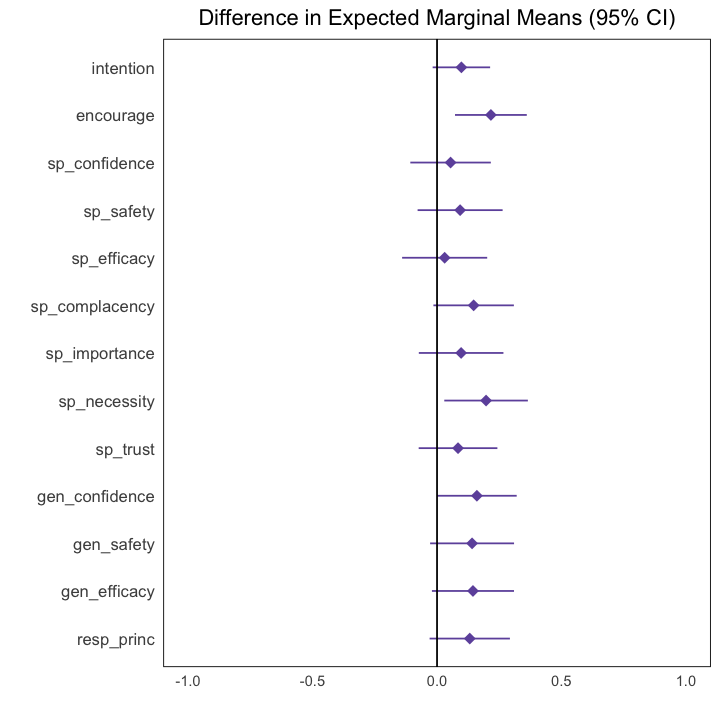

In [17]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 120)
main_res$summary_plot

### Baseline trust in federal government sub-groups

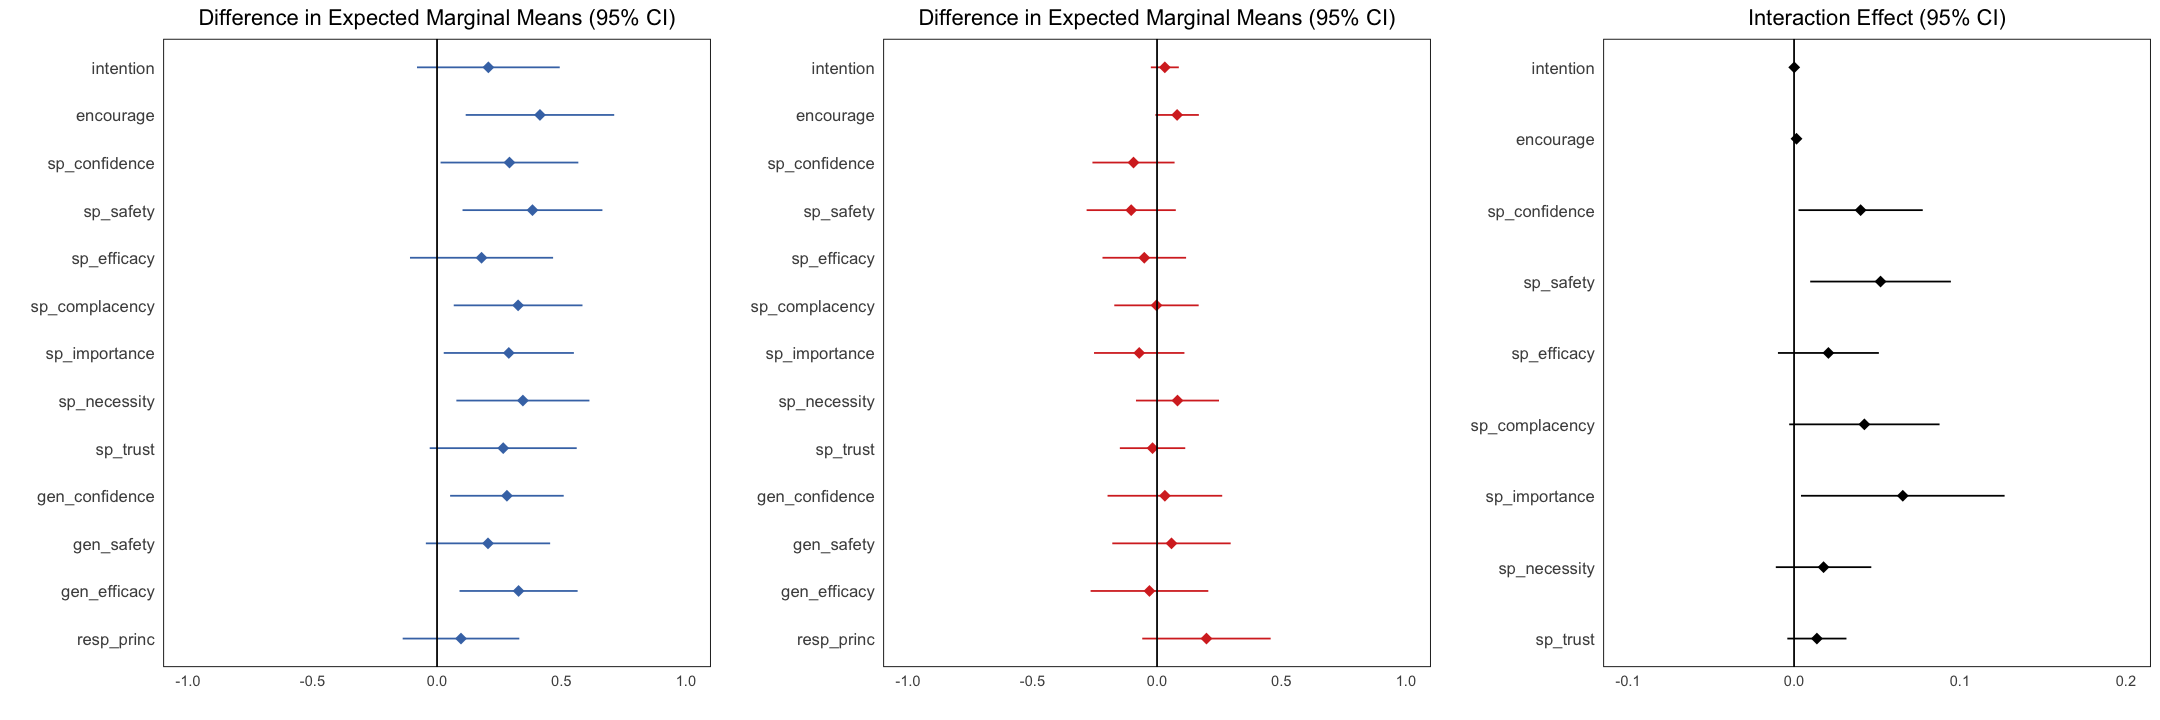

In [18]:
trust_fed_res <- generate_ancova_results(data = vcf_data %>% filter(fed_gov_trust == "trust"), 
                                         plot_color = "#4575b4")
distrust_fed_res <- generate_ancova_results(data = vcf_data %>% filter(fed_gov_trust == "distrust"), 
                                            plot_color = "#d73027")
interaction <- get_interaction_effects(covariate = "fed_gov_trust")

options(repr.plot.width = 18, repr.plot.height = 6, repr.plot.res = 120)
grid.arrange(trust_fed_res$summary_plot, distrust_fed_res$summary_plot, interaction$summary_plot, ncol=3)

In [19]:
interaction$summary_tbl %>% mutate(print = paste0(measure, " (", CI, ")")) %>%.$print %>% print()

[1] "Intentions to Vaccinate (mean = 0; 95% CI = 0, 0; P = 0.5115)"                                 
[2] "Intentions to Encourage Others to Vaccinate (mean = 0.001; 95% CI = -0.001, 0.004; P = 0.1711)"
[3] "COVID-19 Vaccine Confidence (mean = 0.04; 95% CI = 0.003, 0.078; P = 0.0358)"                  
[4] "COVID-19 Vaccine Safety (mean = 0.052; 95% CI = 0.01, 0.094; P = 0.0161)"                      
[5] "COVID-19 Vaccine Effectiveness (mean = 0.021; 95% CI = -0.01, 0.051; P = 0.1816)"              
[6] "COVID-19 Vaccine Complacency (mean = 0.042; 95% CI = -0.003, 0.088; P = 0.0667)"               
[7] "COVID-19 Vaccine Importance (mean = 0.066; 95% CI = 0.004, 0.127; P = 0.0364)"                 
[8] "COVID-19 Vaccine Necessity (mean = 0.018; 95% CI = -0.011, 0.047; P = 0.2252)"                 
[9] "COVID-19 Vaccine Trust (mean = 0.014; 95% CI = -0.004, 0.032; P = 0.1297)"                     


### Baseline trust in the CDC sub-groups

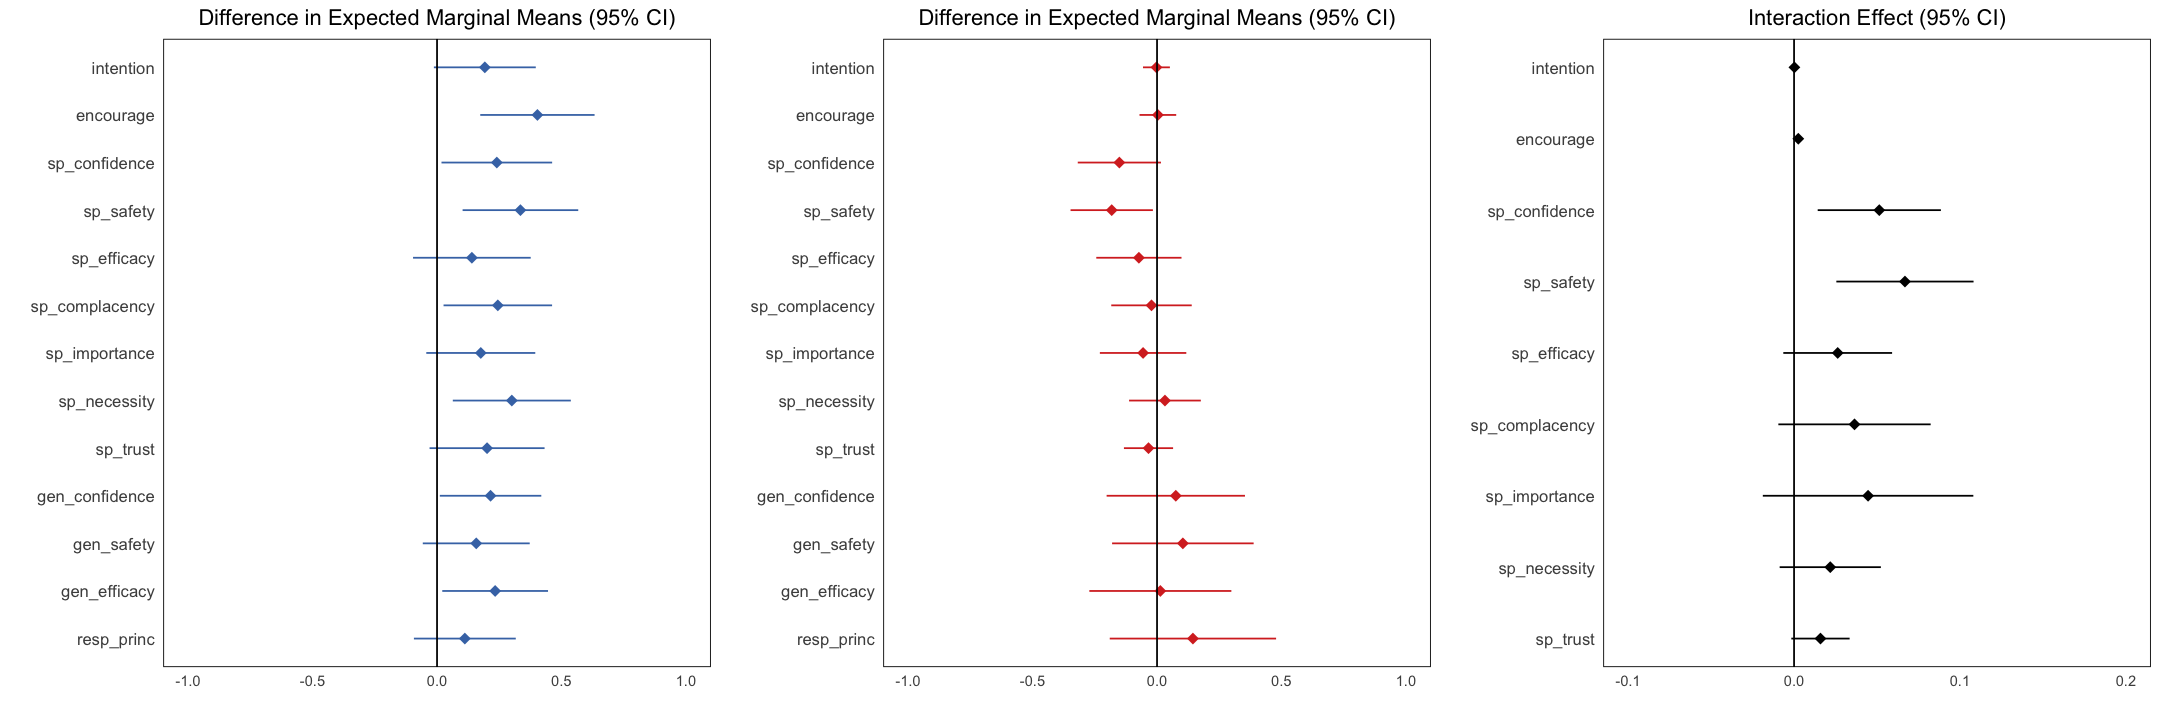

In [20]:
trust_cdc_res <- generate_ancova_results(data = vcf_data %>% filter(cdc_trust == "trust"), 
                                         plot_color = "#4575b4")
distrust_cdc_res <- generate_ancova_results(data = vcf_data %>% filter(cdc_trust == "distrust"), 
                                            plot_color = "#d73027")
interaction <- get_interaction_effects(covariate = "cdc_trust")

options(repr.plot.width = 18, repr.plot.height = 6, repr.plot.res = 120)
grid.arrange(trust_cdc_res$summary_plot, distrust_cdc_res$summary_plot, interaction$summary_plot, ncol=3)

### Political view sub-group analysis

Liberals did better when we filtered the data to the active participants

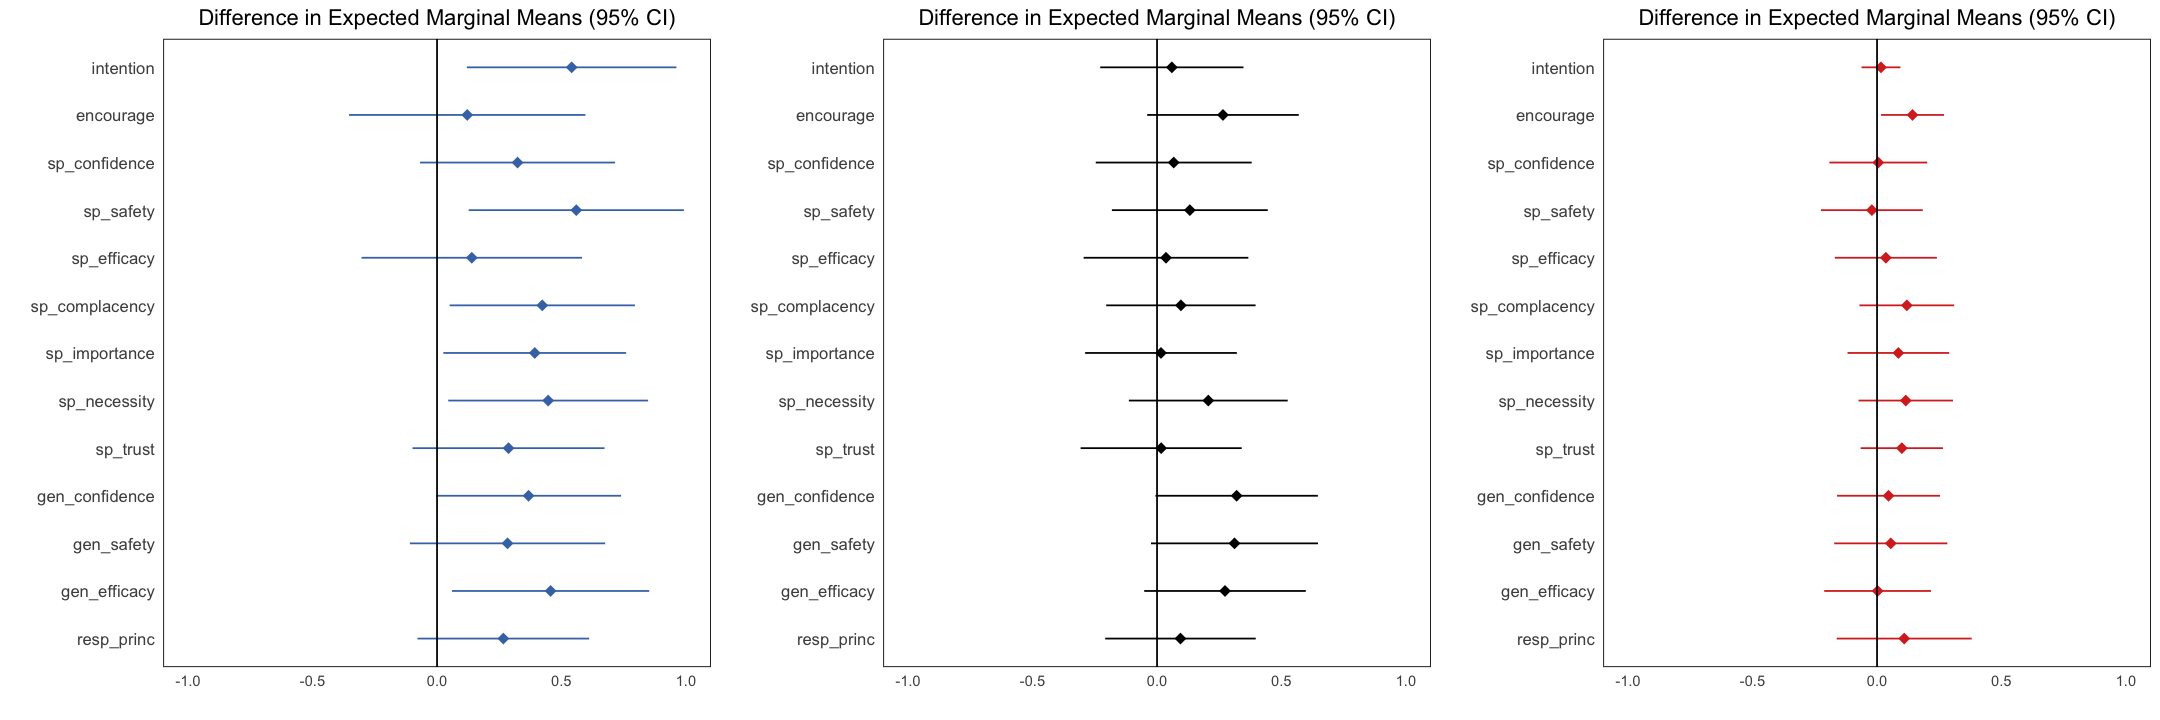

In [21]:
liberal_res <- generate_ancova_results(data = vcf_data %>% filter(political_view2 == "Liberal"), 
                                         plot_color = "#4575b4")
moderate_res <- generate_ancova_results(data = vcf_data %>% filter(political_view2 == "Moderate"), 
                                         plot_color = "black")
conservative_res <- generate_ancova_results(data = vcf_data %>% filter(political_view2 == "Conservative"), 
                                         plot_color = "#d73027")
options(repr.plot.width = 18, repr.plot.height = 6, repr.plot.res = 120)
grid.arrange(liberal_res$summary_plot, moderate_res$summary_plot, conservative_res$summary_plot, ncol = 3)

### 6-week trust ratings of the program information

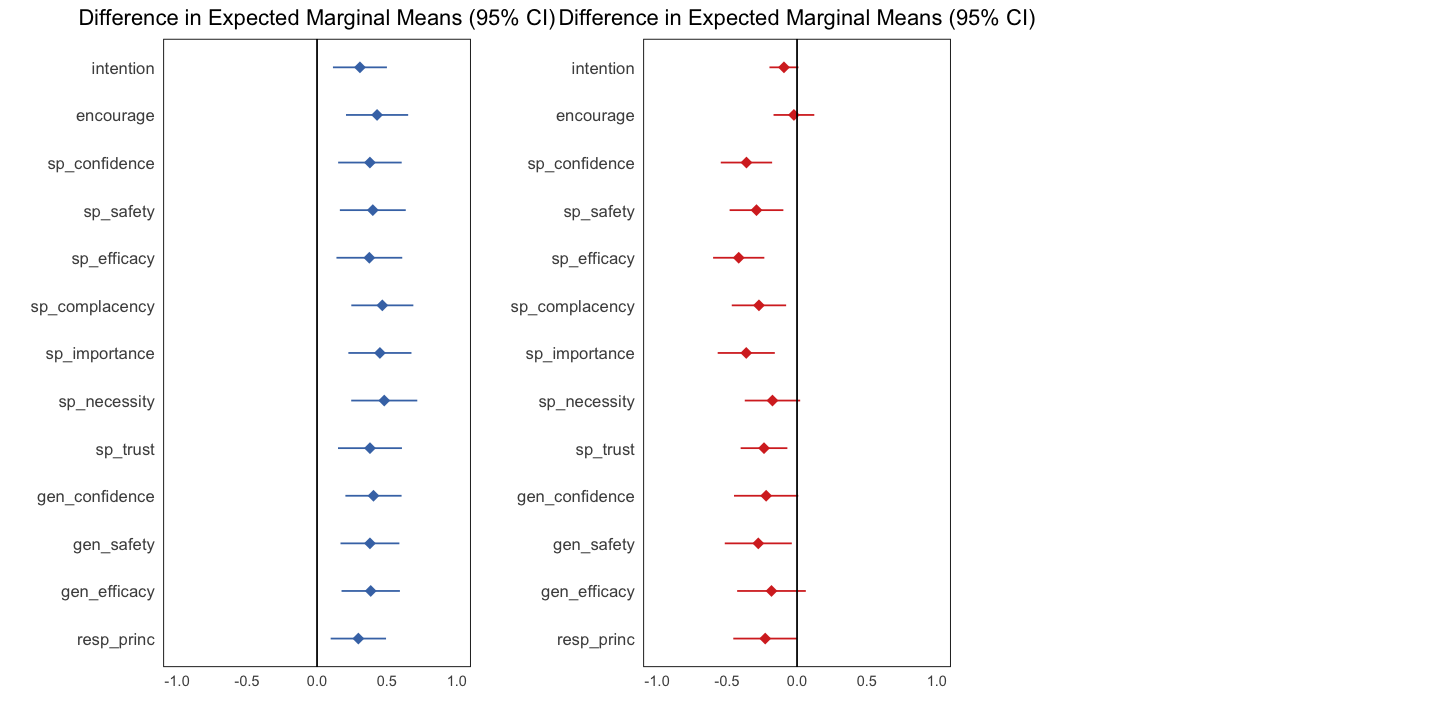

In [22]:
temp <- bind_rows(vcf_data %>%
                        filter(group == "Treatment",
                               as.numeric(trust_info_received_6) > 3,
                               !is.na(trust_info_received_6)),
                       vcf_data %>% filter(group == "Control"))
trusted_at_6wk <- generate_ancova_results(data = temp, plot_color = "#4575b4")

temp <- bind_rows(vcf_data %>%
                        filter(group == "Treatment",
                               as.numeric(trust_info_received_6) <= 3,
                               !is.na(trust_info_received_6)),
                       vcf_data %>% filter(group == "Control"))
nontrusting_at_6wk <- generate_ancova_results(data = temp, plot_color = "#d73027")

options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 120)
grid.arrange(trusted_at_6wk$summary_plot, nontrusting_at_6wk$summary_plot, ncol = 3)